In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/latest-covid-algeria-dataset/Covid_algeria_2020.csv
/kaggle/input/latest-covid-algeria-dataset/Covid_algeria_2021.csv


In [2]:
import numpy as np
import pandas as pd
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as mp
from pandas import DataFrame
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/latest-covid-algeria-dataset/Covid_algeria_2021.csv")
df

,Unnamed: 0,date,temp,weather,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,0,01-01-2021,13 °C,Partly sunny,Algeria,2021-01-02 05:22:33,99897,2762,67395.0,29740.0,227.809861,2.764848
1,1,01-02-2021,10 °C,Partly sunny,Algeria,2021-01-03 05:22:52,100159,2769,67611.0,29779.0,228.407338,2.764604
2,2,01-03-2021,10 °C,Partly sunny,Algeria,2021-01-04 05:22:02,100408,2772,67808.0,29828.0,228.975169,2.760736
3,3,01-04-2021,12 °C,Scattered clouds,Algeria,2021-01-05 05:21:49,100645,2777,67999.0,29869.0,229.515635,2.759203
4,4,01-05-2021,12 °C,Overcast,Algeria,2021-01-06 05:22:16,100873,2782,68185.0,29906.0,230.035577,2.757923
...,...,...,...,...,...,...,...,...,...,...,...,...
215,215,08-06-2021,25 °C,Sunny,Algeria,2021-08-07 04:21:30,179216,4487,NaN,NaN,408.692674,2.503683
216,216,08-07-2021,27 °C,Sunny,Algeria,2021-08-08 04:21:33,180356,4520,NaN,NaN,411.292384,2.506154
217,217,08-01-2021,NaN,NaN,Algeria,2021-08-02 04:21:36,172564,4291,116009.0,52264.0,393.523137,2.486614
218,218,08-02-2021,NaN,NaN,Algeria,2021-08-03 04:21:39,173922,4329,116770.0,52823.0,396.619985,2.489047


EDA of Covid cases in Algeria 2021

In [4]:
#cleaning of Data
del df['Unnamed: 0']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 220 non-null    object 
 1   temp                 217 non-null    object 
 2   weather              217 non-null    object 
 3   Country_Region       220 non-null    object 
 4   Last_Update          220 non-null    object 
 5   Confirmed            220 non-null    int64  
 6   Deaths               220 non-null    int64  
 7   Recovered            216 non-null    float64
 8   Active               216 non-null    float64
 9   Incident_Rate        220 non-null    float64
 10  Case_Fatality_Ratio  220 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 19.0+ KB


In [6]:
df.isna().mean()*100 #calculating % of missing data

date                   0.000000
temp                   1.363636
weather                1.363636
Country_Region         0.000000
Last_Update            0.000000
Confirmed              0.000000
Deaths                 0.000000
Recovered              1.818182
Active                 1.818182
Incident_Rate          0.000000
Case_Fatality_Ratio    0.000000
dtype: float64

In [7]:
 df['date']=pd.to_datetime(df['date']) #Converting data type to date time

In [8]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:title={'center':'HIGHEST CASES IN DIFFERENT WEATHER CONDITIONS'}, xlabel='weather'>

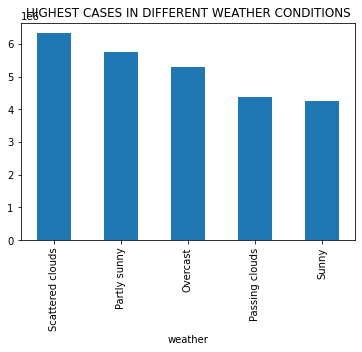

In [9]:
df.groupby('weather')['Confirmed'].sum().nlargest(5).plot.bar(title='HIGHEST CASES IN DIFFERENT WEATHER CONDITIONS')

<AxesSubplot:title={'center':'HIGHEST DEATHS IN DIFFERENT WEATHER CONDITIONS'}, xlabel='weather'>

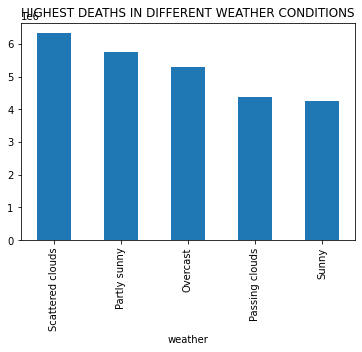

In [10]:
df.groupby('weather')['Confirmed'].sum().nlargest(5).plot.bar(title='HIGHEST DEATHS IN DIFFERENT WEATHER CONDITIONS')

Prediction: As the weather is sunny and bright, more people tend to step out hence more cases and deaths

In [11]:
df_1=df.groupby(df['date'].dt.month)['Confirmed'].sum()
df_1

date
1    3212268
2    3096714
3    3577898
4    3581338
5    3890403
6    4030589
7    4734511
8    1417400
Name: Confirmed, dtype: int64

[Text(0.5, 1.0, 'Monthy Confirmed cases'), Text(0.5, 0, 'Months')]

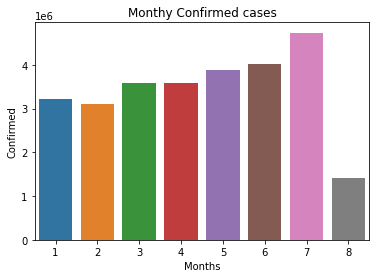

In [12]:
sns.barplot(y=df_1,x=df_1.index).set(title='Monthy Confirmed cases',xlabel='Months')

In [13]:
df_2=df.groupby(df['date'].dt.month)['Deaths'].sum()
df_2

date
1     87734
2     82303
3     94314
4     94693
5    104551
6    107894
7    121911
8     35392
Name: Deaths, dtype: int64

[Text(0.5, 1.0, 'Monthy Death cases'), Text(0.5, 0, 'Months')]

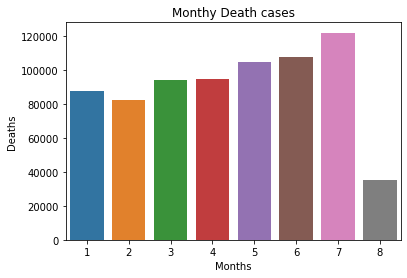

In [14]:
sns.barplot(y=df_2,x=df_2.index).set(title='Monthy Death cases',xlabel='Months')

In [15]:
df1=DataFrame(df_1)
df2=DataFrame(df_2)
df1=df1.join(df2,on='date',how='inner')


df1.reset_index(inplace=True)
df1=df1.rename(columns={'date':'Months'})
df1

,Months,Confirmed,Deaths
0,1,3212268,87734
1,2,3096714,82303
2,3,3577898,94314
3,4,3581338,94693
4,5,3890403,104551
5,6,4030589,107894
6,7,4734511,121911
7,8,1417400,35392


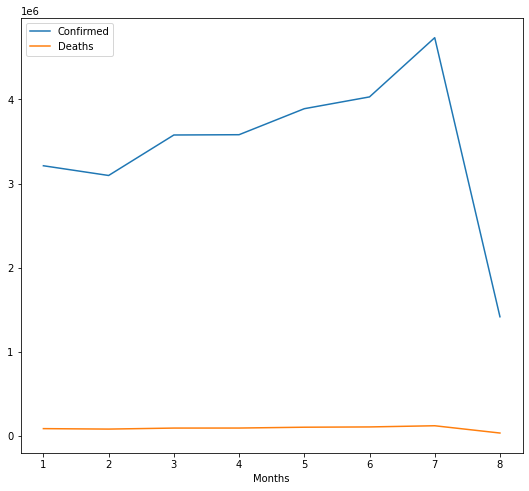

In [16]:
df1.plot(x="Months", y=["Confirmed", "Deaths"], kind="line", figsize=(9, 8))
mp.show()

There is gradual increase in Confirmed cases from March until July, July having the highest cases